# Linear Regression from Scratch on California Housing

This notebook demonstrates linear regression using both Gradient Descent and the Normal Equation. We use the California Housing dataset, preprocess features, train models, and evaluate performance.

---

## 1. Imports & Data Loading

````python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import math

df=pd.read_csv('california_housing_train.csv')
df_test=pd.read_csv('california_housing_test.csv')

# 2. Data Preprocessing

In [2]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

scaler = RobustScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# 3. Linear Regression Class

In [3]:
class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.theta = None

    def rmse(self, y_pred, y):
        return math.sqrt(self.mse(y_pred, y))

    def mse(self, y_pred, y):
        y = np.array(y, dtype=float).reshape(-1)
        return np.mean((y_pred - y) ** 2)

    def mae(self, y_pred, y):
        y = np.array(y, dtype=float).reshape(-1)
        return np.mean(np.abs(y - y_pred))

    def r2_score(self, y_pred, y_true):
        y_true = np.array(y_true, dtype=float).reshape(-1)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

    def fit(self, x, y, x_val=None, y_val=None, epochs=10000, lr=0.001):
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        self.w = np.ones(x.shape[1]) * 0.001
        self.b = 0.001
        n = x.shape[0]
        loss = []
        val_loss = []
        val_rmse = []
        val_mse = []
        val_mae = []
        val_r2 = []
        for i in range(epochs):
            y_pred = np.dot(x, self.w) + self.b
            dw = (1 / n) * np.dot(x.T, (y_pred - y))
            db = (1 / n) * np.sum(y_pred - y)
            self.w -= lr * dw
            self.b -= lr * db
            loss.append(self.rmse(np.dot(x, self.w) + self.b, y))
            if x_val is not None and y_val is not None:
                y_val_pred = np.dot(x_val, self.w) + self.b
                val_loss.append(self.rmse(y_val_pred, y_val))
                val_rmse.append(self.rmse(y_val_pred, y_val))
                val_mse.append(self.mse(y_val_pred, y_val))
                val_mae.append(self.mae(y_val_pred, y_val))
                val_r2.append(self.r2_score(y_val_pred, y_val))
            if i % 1000 == 0:
                print(f"Epoch {i} | RMSE: {loss[-1]:.5f}")
        return loss, val_loss, val_rmse, val_mse, val_mae, val_r2

    def fit_normal(self, X, y, use_pinv=True):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1, 1)
        if use_pinv:
            self.theta = (np.linalg.pinv(X) @ y).ravel()
        else:
            self.theta = np.linalg.solve(X.T @ X, X.T @ y).ravel()
        return self.theta

    def predict_gd(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.w) + self.b

    def predict_normal(self, X):
        if self.theta is None:
            raise ValueError("Model parameters not initialized. Call fit_normal() before predict_normal().")
        X = np.array(X, dtype=float)
        return (X @ self.theta.reshape(-1, 1)).ravel()

# 4. Training with Gradient Descent

In [4]:
rg = LinearRegression()
loss, val_loss, val_rmse, val_mse, val_mae, val_r2 = rg.fit(x_scaled, y, x_test_scaled, y_test)

Epoch 0 | RMSE: 237201.02137
Epoch 1000 | RMSE: 111475.60382
Epoch 2000 | RMSE: 88278.30739
Epoch 3000 | RMSE: 81519.67319
Epoch 4000 | RMSE: 78540.44105
Epoch 5000 | RMSE: 76966.07783
Epoch 6000 | RMSE: 76032.42791
Epoch 7000 | RMSE: 75416.14837
Epoch 8000 | RMSE: 74968.32987
Epoch 9000 | RMSE: 74617.20812


# 5. Plotting Losses

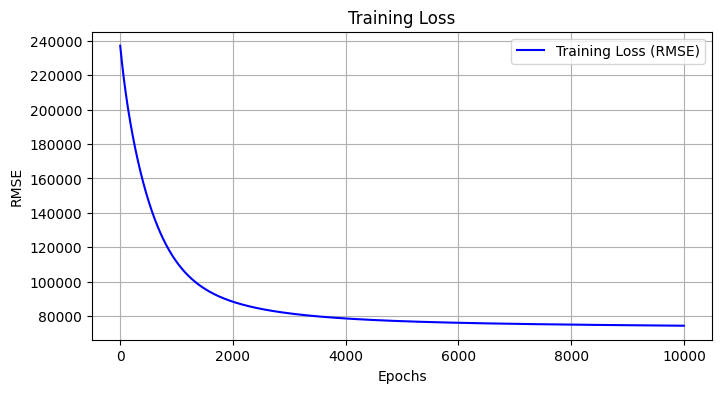

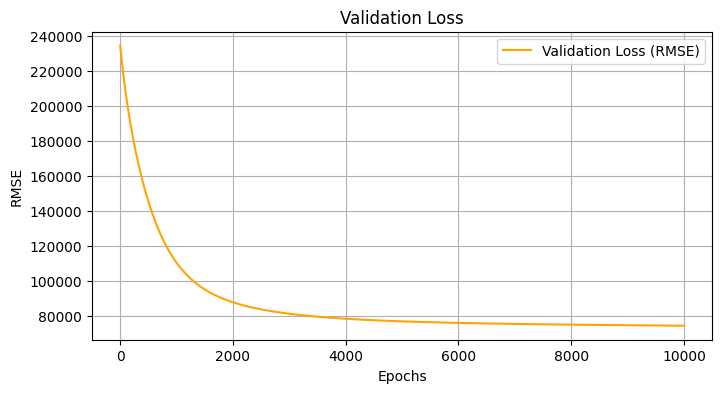

In [5]:
plt.figure(figsize=(8,4))
plt.plot(loss, label='Training Loss (RMSE)', color='blue')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(val_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 5b. Comparing Different Learning Rates for Gradient Descent

Epoch 0 | RMSE: 237505.80954
Epoch 1000 | RMSE: 209498.87305
Epoch 2000 | RMSE: 188925.72652
Epoch 3000 | RMSE: 172473.72405
Epoch 4000 | RMSE: 158812.10372
Epoch 0 | RMSE: 237201.02137
Epoch 1000 | RMSE: 111475.60382
Epoch 2000 | RMSE: 88278.30739
Epoch 3000 | RMSE: 81519.67319
Epoch 4000 | RMSE: 78540.44105
Epoch 0 | RMSE: 234176.39750
Epoch 1000 | RMSE: 74323.14278
Epoch 2000 | RMSE: 72639.81908
Epoch 3000 | RMSE: 71710.50769
Epoch 4000 | RMSE: 71073.91326
Epoch 0 | RMSE: 206621.10303
Epoch 1000 | RMSE: 69681.52726
Epoch 2000 | RMSE: 69467.24455
Epoch 3000 | RMSE: 69459.11500
Epoch 4000 | RMSE: 69458.80036


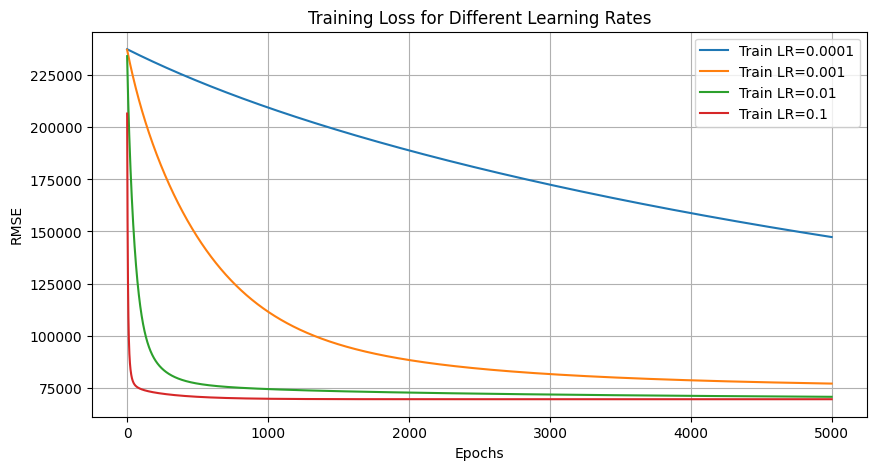

In [6]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 5000
results = {}

for lr in learning_rates:
    rg = LinearRegression()
    loss, val_loss, val_rmse, val_mse, val_mae, val_r2 = rg.fit(x_scaled, y, x_test_scaled, y_test, epochs=epochs, lr=lr)
    results[lr] = (loss, val_loss, val_rmse, val_mse, val_mae, val_r2)

plt.figure(figsize=(10,5))
for lr in learning_rates:
    plt.plot(results[lr][0], label=f'Train LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


Epoch 0 | RMSE: 237505.80954
Epoch 1000 | RMSE: 209498.87305
Epoch 2000 | RMSE: 188925.72652
Epoch 3000 | RMSE: 172473.72405
Epoch 4000 | RMSE: 158812.10372
Epoch 0 | RMSE: 237201.02137
Epoch 1000 | RMSE: 111475.60382
Epoch 2000 | RMSE: 88278.30739
Epoch 3000 | RMSE: 81519.67319
Epoch 4000 | RMSE: 78540.44105
Epoch 0 | RMSE: 234176.39750
Epoch 1000 | RMSE: 74323.14278
Epoch 2000 | RMSE: 72639.81908
Epoch 3000 | RMSE: 71710.50769
Epoch 4000 | RMSE: 71073.91326
Epoch 0 | RMSE: 206621.10303
Epoch 1000 | RMSE: 69681.52726
Epoch 2000 | RMSE: 69467.24455
Epoch 3000 | RMSE: 69459.11500
Epoch 4000 | RMSE: 69458.80036


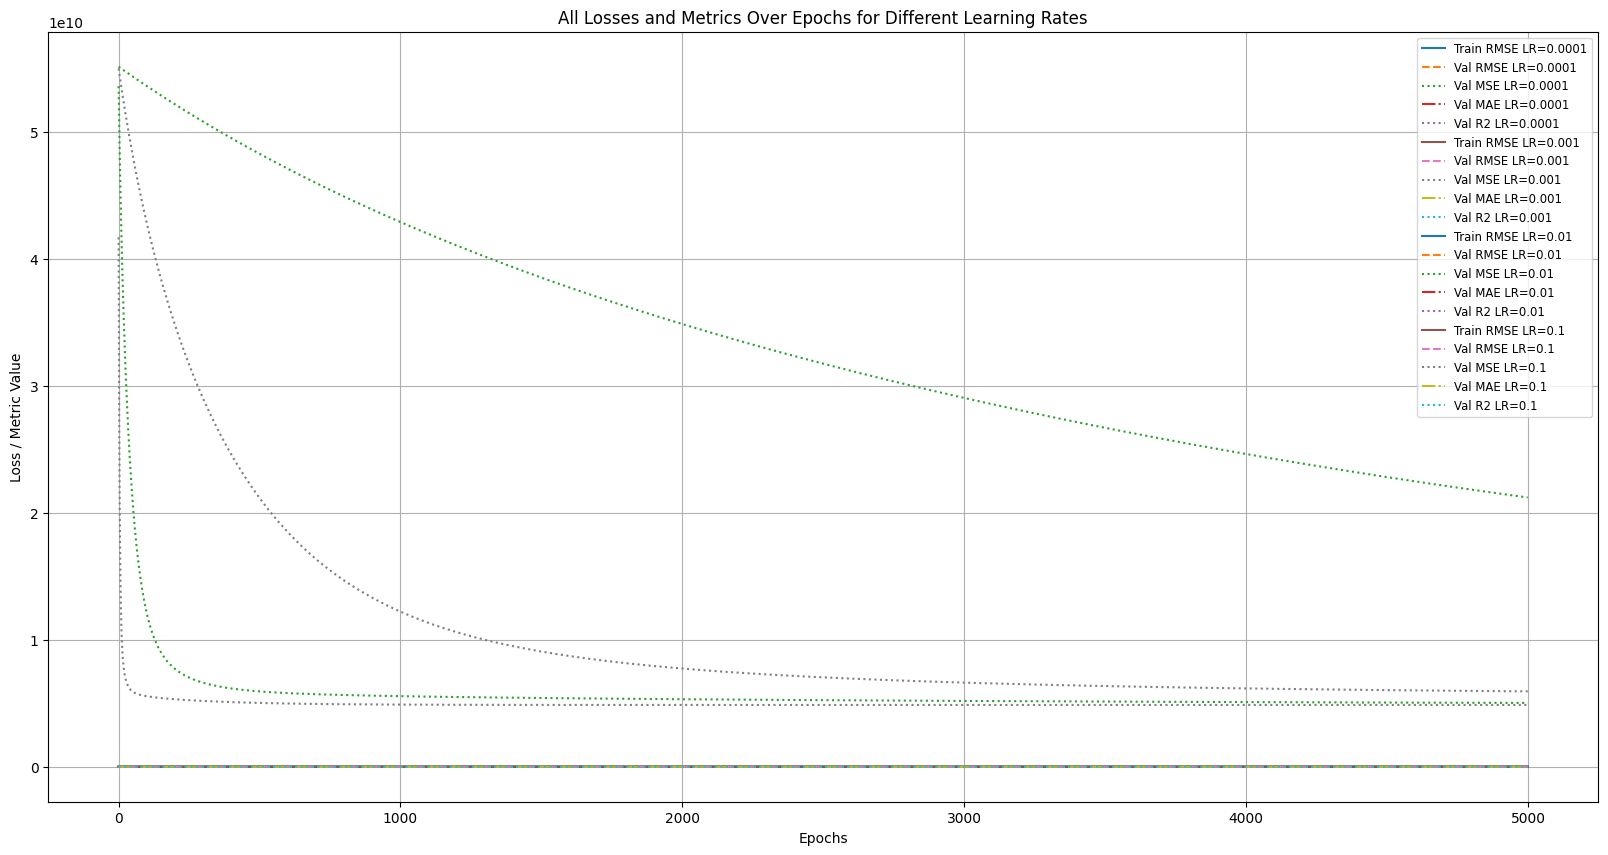

In [7]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 5000
results = {}

for lr in learning_rates:
    rg = LinearRegression()
    loss, val_loss, val_rmse, val_mse, val_mae, val_r2 = rg.fit(x_scaled, y, x_test_scaled, y_test, epochs=epochs, lr=lr)
    results[lr] = {
        'loss': loss,
        'val_loss': val_loss,
        'val_rmse': val_rmse,
        'val_mse': val_mse,
        'val_mae': val_mae,
        'val_r2': val_r2
    }

plt.figure(figsize=(20,10))
for lr in learning_rates:
    plt.plot(results[lr]['loss'], label=f'Train RMSE LR={lr}')
    plt.plot(results[lr]['val_loss'], label=f'Val RMSE LR={lr}', linestyle='--')
    plt.plot(results[lr]['val_mse'], label=f'Val MSE LR={lr}', linestyle=':')
    plt.plot(results[lr]['val_mae'], label=f'Val MAE LR={lr}', linestyle='-.')
    plt.plot(results[lr]['val_r2'], label=f'Val R2 LR={lr}', linestyle='dotted')
plt.xlabel('Epochs')
plt.ylabel('Loss / Metric Value')
plt.title('All Losses and Metrics Over Epochs for Different Learning Rates')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

# 6. Evaluation (Gradient Descent)

In [8]:
y_pred = rg.predict_gd(x_test_scaled)
print(f"RMSE: {rg.rmse(y_pred, y_test):.5f}")
print(f"MSE: {rg.mse(y_pred, y_test):.5f}")
print(f"MAE: {rg.mae(y_pred, y_test):.5f}")
print(f"R2 Score: {rg.r2_score(y_pred, y_test):.5f}")

RMSE: 69765.26627
MSE: 4867192377.13230
MAE: 50351.82646
R2 Score: 0.61951


# 7. Training & Evaluation (Normal Equation)

In [9]:
rg.fit_normal(x_scaled, y)
y_pred_normal = rg.predict_normal(x_test_scaled)
print(f"RMSE (Normal Eq): {rg.rmse(y_pred_normal, y_test):.5f}")
print(f"MSE (Normal Eq): {rg.mse(y_pred_normal, y_test):.5f}")
print(f"MAE (Normal Eq): {rg.mae(y_pred_normal, y_test):.5f}")
print(f"R2 Score (Normal Eq): {rg.r2_score(y_pred_normal, y_test):.5f}")

RMSE (Normal Eq): 173033.54599
MSE (Normal Eq): 29940608038.47246
MAE (Normal Eq): 141365.07629
R2 Score (Normal Eq): -1.34061


# 8. Visualizing the Regression Hyperplane (Normal Equation)

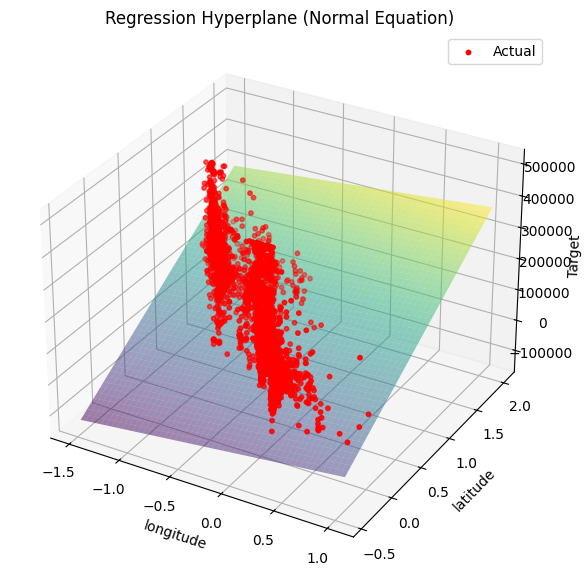

In [10]:
feat1, feat2 = x_scaled.columns[:2]
X_vis = x_test_scaled[[feat1, feat2]].values

f1 = np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 50)
f2 = np.linspace(X_vis[:,1].min(), X_vis[:,1].max(), 50)
F1, F2 = np.meshgrid(f1, f2)
X_grid = np.c_[F1.ravel(), F2.ravel()]

X_full = np.zeros((X_grid.shape[0], x_test_scaled.shape[1]))
X_full[:,0] = X_grid[:,0]
X_full[:,1] = X_grid[:,1]

Z = rg.predict_normal(X_full).reshape(F1.shape)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(F1, F2, Z, alpha=0.5, cmap='viridis')
ax.scatter(X_vis[:,0], X_vis[:,1], y_test.values, color='red', s=10, label='Actual')
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel('Target')
ax.set_title('Regression Hyperplane (Normal Equation)')
plt.legend()
plt.show()

# 9. Finish

In [11]:
print("Finished")

Finished
